<a href="https://colab.research.google.com/github/karim-hb/predict/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import yfinance as yf

import numpy as np
import pandas as pd
from sklearn.preprocessing  import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime

plt.style.use('fivethirtyeight')

In [2]:

start = "2022-01-01"
df = yf.download("AAPL", start=start)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953888,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056961,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225082,86709100
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700


In [4]:
df.shape

(501, 6)

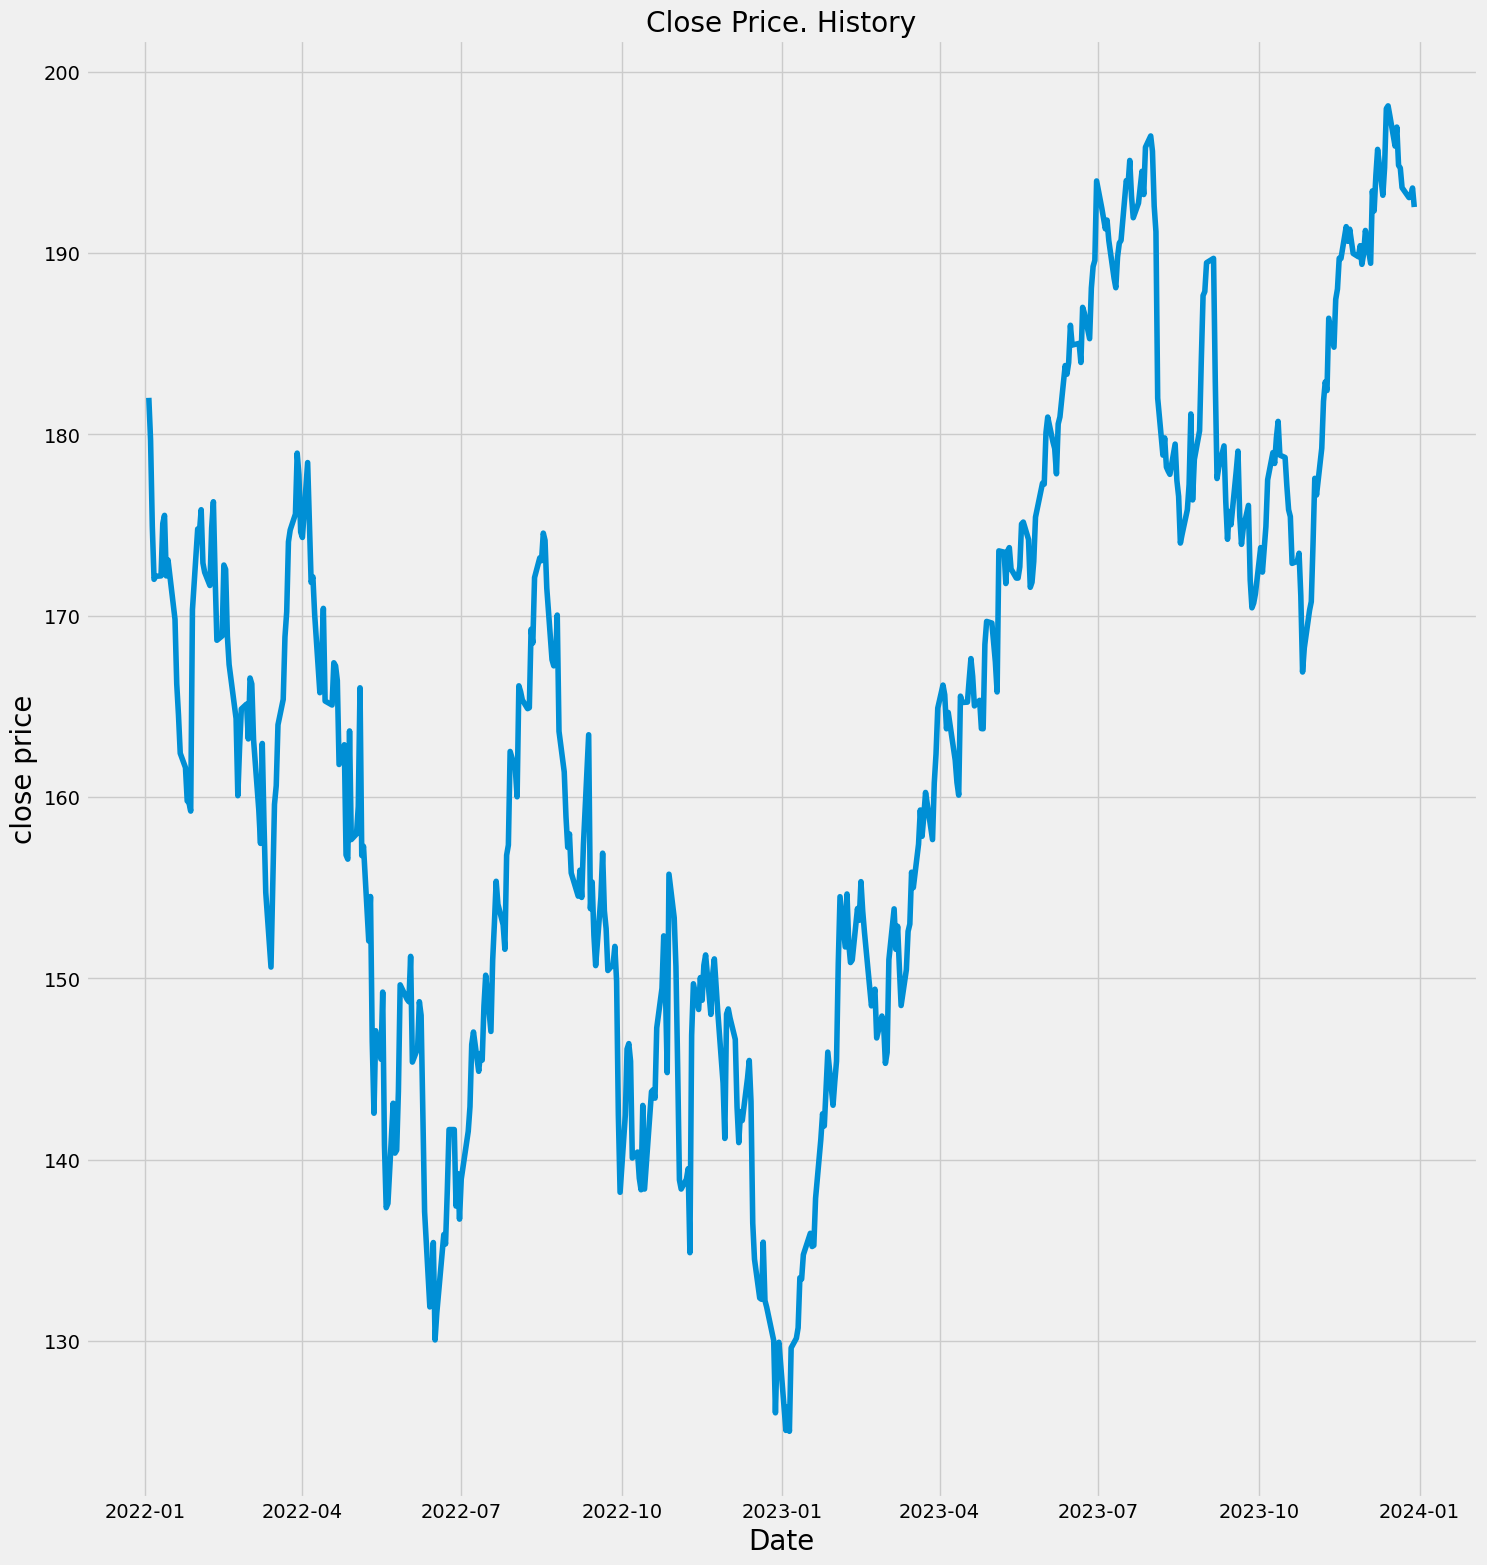

In [6]:
# plot data
plt.figure(figsize=(16,18))
plt.title("Close Price. History")
plt.plot(df['Close'])
plt.xlabel('Date' , fontsize = 20)
plt.ylabel('close price' , fontsize = 20)
plt.show()

In [7]:
# get the number of trainig data set
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

401

In [8]:
# scale data
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(dataset)

np.set_printoptions(precision=4, suppress=True)

scaled_data

array([[0.7797],
       [0.7481],
       [0.6827],
       [0.6428],
       [0.6451],
       [0.6454],
       [0.6849],
       [0.6911],
       [0.6454],
       [0.6574],
       [0.6127],
       [0.5638],
       [0.5403],
       [0.5116],
       [0.5008],
       [0.4756],
       [0.4743],
       [0.4679],
       [0.6199],
       [0.6808],
       [0.6785],
       [0.6953],
       [0.6551],
       [0.6481],
       [0.6381],
       [0.6815],
       [0.7013],
       [0.6444],
       [0.5968],
       [0.6001],
       [0.6536],
       [0.6503],
       [0.6001],
       [0.5785],
       [0.5377],
       [0.4795],
       [0.5161],
       [0.5449],
       [0.5486],
       [0.5224],
       [0.5683],
       [0.5638],
       [0.522 ],
       [0.469 ],
       [0.4436],
       [0.5189],
       [0.4583],
       [0.4065],
       [0.3503],
       [0.4114],
       [0.473 ],
       [0.4871],
       [0.533 ],
       [0.5522],
       [0.5993],
       [0.6183],
       [0.6711],
       [0.68  ],
       [0.692 

In [14]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])


In [15]:
# convert x_train and y_train in numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [17]:
# Reshape the data (number of sample , number of step , number of feature)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape

(341, 60, 1)

In [18]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1] ,1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
# compile the model
model.compile(optimizer='adam' , loss='mean_squared_error')

In [20]:
#train data
model.fit(x_train,y_train,batch_size=1,epochs=1)

341/341 [==============================] - 13s 26ms/step - loss: 0.0109


In [21]:
#create the testing data set
test_data = scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range (60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [22]:
# convert x_test  in numpy array
x_test = np.array(x_test)


In [23]:
# Reshape
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1] , 1))
x_test.shape

(100, 60, 1)

In [24]:
#get the models presicted price
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 2s 21ms/step


In [26]:
# get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

5.254844055175782

<ipython-input-30-70bc3ec1c86f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


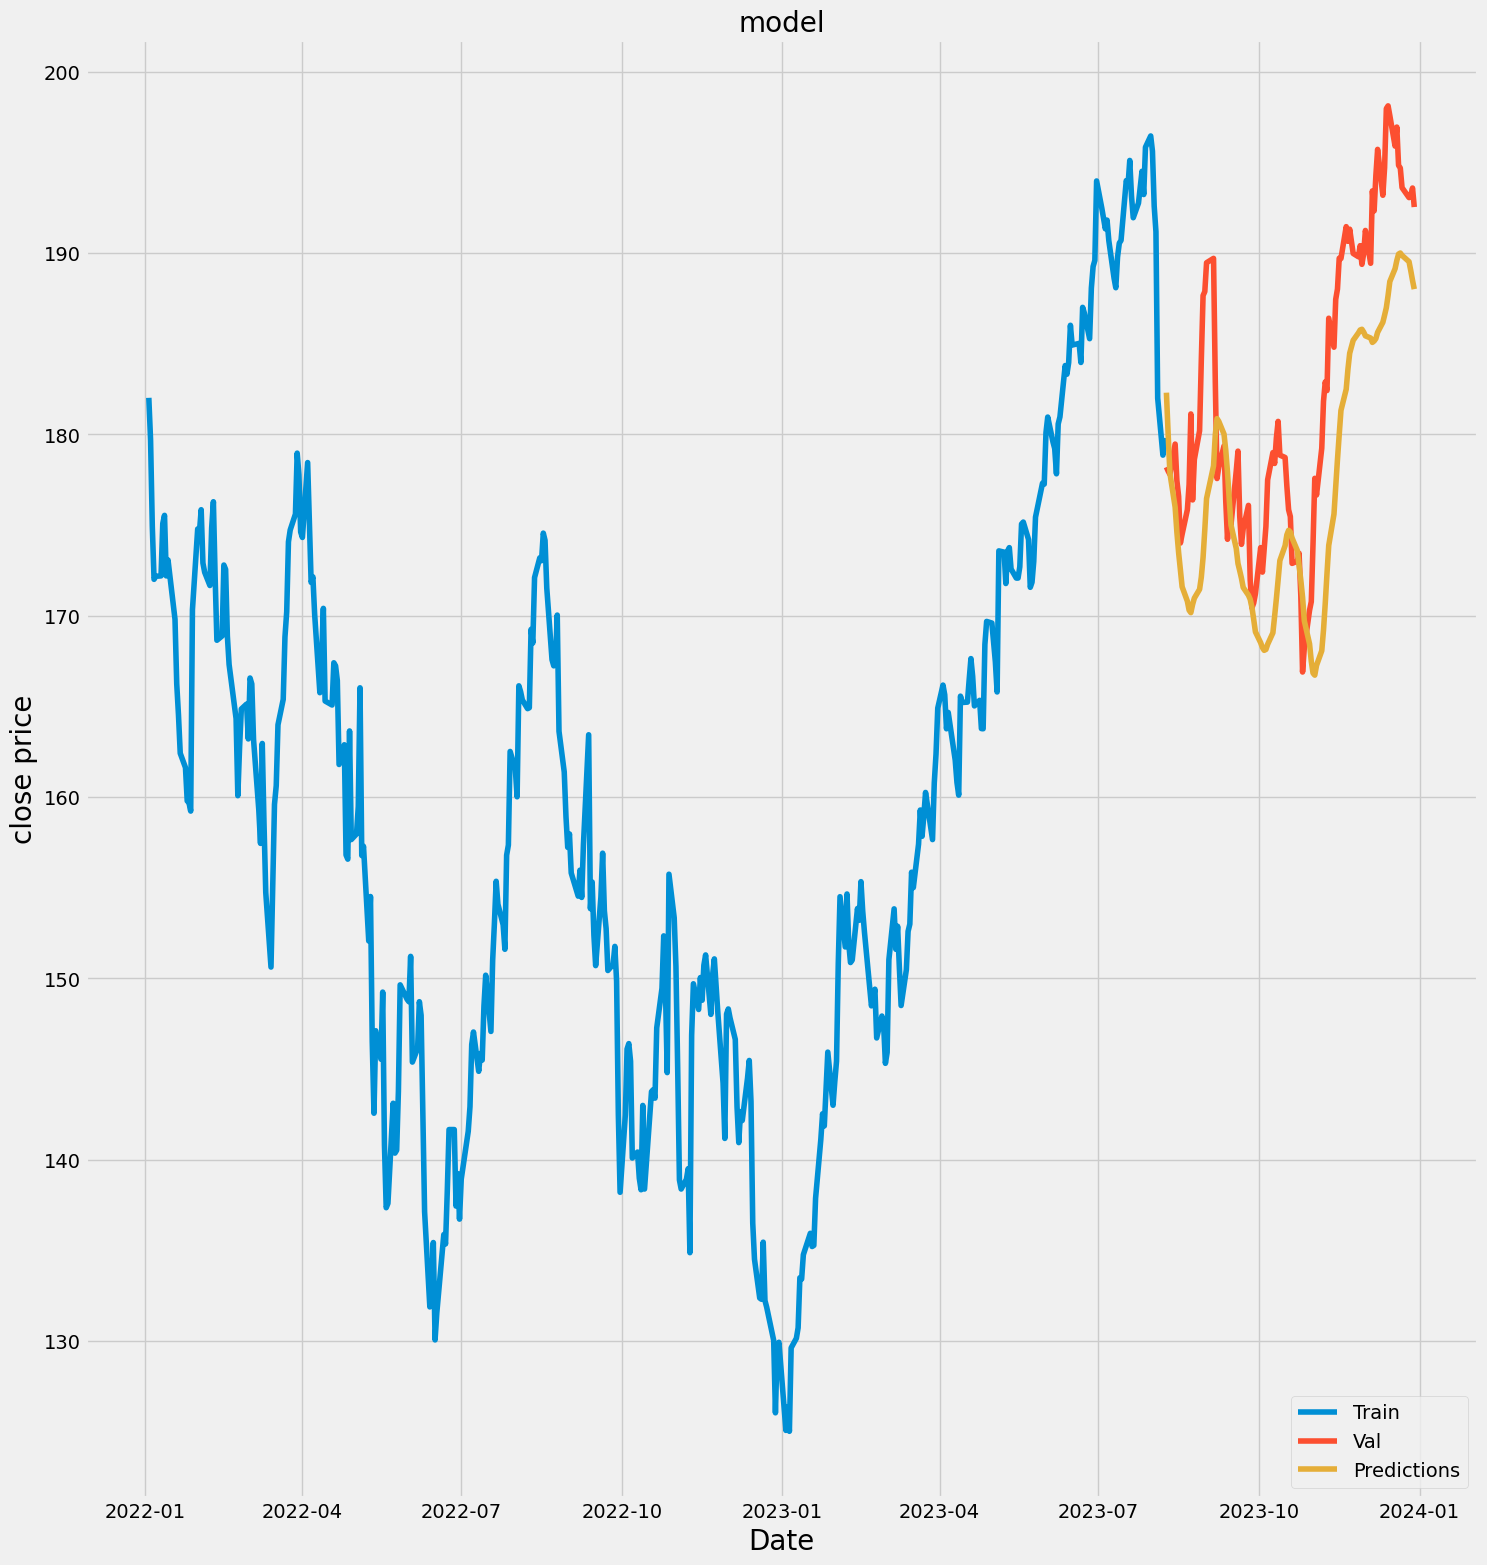

In [30]:
# plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,18))
plt.title("model")
plt.xlabel('Date' , fontsize = 20)
plt.ylabel('close price' , fontsize = 20)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train' , 'Val','Predictions'] , loc='lower right')
plt.show()

In [31]:
#show valid price and pridicted price
valid

,Close,Predictions
Date,,
2023-08-09,178.190002,182.294128
2023-08-10,177.970001,180.000214
2023-08-11,177.789993,177.856049
2023-08-14,179.460007,175.982956
2023-08-15,177.449997,174.602570
...,...,...
2023-12-22,193.600006,189.862411
2023-12-26,193.050003,189.517258
2023-12-27,193.149994,189.021881
